<a href="https://colab.research.google.com/github/Izzah-Khursheed/Smart-Urban-Planning---Traffic-Flow-Optimizer/blob/main/Data_Fetching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI-powered Smart Urban Planning & Traffic Flow Optimizer**

In [3]:
# Install OSMnx for OpenStreetMap
!pip install osmnx folium geopandas

# Install SUMO Traffic Simulator
!apt-get update
!apt-get install -y sumo sumo-tools sumo-doc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 2.1 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,230 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,610 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backp

In [4]:
!pip install --upgrade --force-reinstall osmnx folium geopandas

  Using cached osmnx-2.0.1-py3-none-any.whl.metadata (4.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.3 MB/s eta 0:00:00
Using cached osmnx-2.0.1-py3-none-any.whl (99 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [19]:
!pip install osmnx requests

In [20]:
import osmnx as ox
print(ox.__version__)

2.0.1


In [33]:
import requests
import json

# Your API Key (Replace with your actual key from LocationIQ, OpenCage, etc.)
API_KEY = "pk.db29fc5fd77946d0a831bed8946eff5f"

# Define Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"
nominatim_url = "https://us1.locationiq.com/v1/search.php"  # Using LocationIQ's API

# List of cities to fetch data for
cities = ["Faisalabad", "Lahore", "Karachi", "Islamabad"]

# Define highway types to ensure we fetch all relevant roads
highway_types = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "unclassified", "residential", "service", "living_street"
]

for city in cities:
    print(f"Fetching bounding box for {city}...")

    # Use Nominatim API to get bounding box for the city
    nominatim_params = {
        "key": API_KEY,  # API key for LocationIQ
        "q": city + ", Pakistan",
        "format": "json",
        "limit": 1
    }
    response = requests.get(nominatim_url, params=nominatim_params)

    if response.status_code == 200:
        geo_data = response.json()
        if geo_data:
            bbox = [
                float(geo_data[0]["boundingbox"][0]),  # Min Lat
                float(geo_data[0]["boundingbox"][2]),  # Min Lon
                float(geo_data[0]["boundingbox"][1]),  # Max Lat
                float(geo_data[0]["boundingbox"][3])   # Max Lon
            ]
            print(f"Bounding box for {city}: {bbox}")

            # Construct Overpass Query using the fetched bounding box
            overpass_query = f"""
            [out:json][timeout:90];
            (
              way["highway"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]});
            );
            out body;
            >;
            out skel qt;
            """

            print(f"Fetching road data for {city}...")

            # Send request to Overpass API
            response = requests.get(overpass_url, params={'data': overpass_query})

            if response.status_code == 200:
                data = response.json()
                num_elements = len(data.get('elements', []))
                print(f"Total road elements fetched for {city}: {num_elements}")

                # Save JSON data to a file
                filename = f"{city.lower()}_roads.json"
                with open(filename, "w") as f:
                    json.dump(data, f, indent=4)

                print(f"Road data saved to '{filename}'\n")
            else:
                print(f"Failed to fetch road data for {city}, HTTP Status Code: {response.status_code}\n")
        else:
            print(f"Failed to retrieve bounding box for {city}. Check API key and response format.\n")
    else:
        print(f"Failed to connect to Nominatim API for {city}, HTTP Status Code: {response.status_code}\n")

Fetching bounding box for Faisalabad...
Bounding box for Faisalabad: [31.335641, 72.99379, 31.526443, 73.193035]
Fetching road data for Faisalabad...
Total road elements fetched for Faisalabad: 93740
Road data saved to 'faisalabad_roads.json'

Fetching bounding box for Lahore...
Bounding box for Lahore: [31.4056822, 74.1541829, 31.7256822, 74.4741829]
Fetching road data for Lahore...
Total road elements fetched for Lahore: 361326
Road data saved to 'lahore_roads.json'

Fetching bounding box for Karachi...
Bounding box for Karachi: [24.4273517, 66.2862312, 25.676796, 67.5827753]
Fetching road data for Karachi...
Total road elements fetched for Karachi: 577456
Road data saved to 'karachi_roads.json'

Fetching bounding box for Islamabad...
Bounding box for Islamabad: [33.5338118, 72.9051511, 33.8538118, 73.2251511]
Fetching road data for Islamabad...
Total road elements fetched for Islamabad: 303866
Road data saved to 'islamabad_roads.json'



In [24]:
import requests
import json

# Define Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"

# Dictionary with city names and their respective bounding boxes (latitude/longitude)
city_bounding_boxes = {
    "Faisalabad": [31.325, 73.000, 31.525, 73.300],  # (min lat, min lon, max lat, max lon)
    "Lahore": [31.400, 74.100, 31.700, 74.500],
    "Karachi": [24.750, 66.700, 25.350, 67.500],
    "Islamabad": [33.600, 72.800, 33.850, 73.200]
}

# Define highway types to ensure we fetch all relevant roads
highway_types = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "unclassified", "residential", "service", "living_street"
]

for city, bbox in city_bounding_boxes.items():
    print(f"Fetching road data for {city}...")

    # Construct Overpass Query using bounding box instead of area ID
    overpass_query = f"""
    [out:json][timeout:90];
    (
      way["highway"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]});
    );
    out body;
    >;
    out skel qt;
    """

    # Send request
    response = requests.get(overpass_url, params={'data': overpass_query})

    # Check if request was successful
    if response.status_code == 200:
        data = response.json()

        # Check for elements
        num_elements = len(data.get('elements', []))
        print(f"Total road elements fetched for {city}: {num_elements}")

        # Save JSON data to a file
        filename = f"{city.lower()}_roads.json"
        with open(filename, "w") as f:
            json.dump(data, f, indent=4)

        print(f"Road data saved to '{filename}'\n")
    else:
        print(f"Failed to fetch road data for {city}, HTTP Status Code: {response.status_code}\n")

Fetching road data for Faisalabad...
Total road elements fetched for Faisalabad: 107714
Road data saved to 'faisalabad_roads.json'

Fetching road data for Lahore...
Total road elements fetched for Lahore: 386315
Road data saved to 'lahore_roads.json'

Fetching road data for Karachi...
Total road elements fetched for Karachi: 557658
Road data saved to 'karachi_roads.json'

Fetching road data for Islamabad...
Total road elements fetched for Islamabad: 260196
Road data saved to 'islamabad_roads.json'



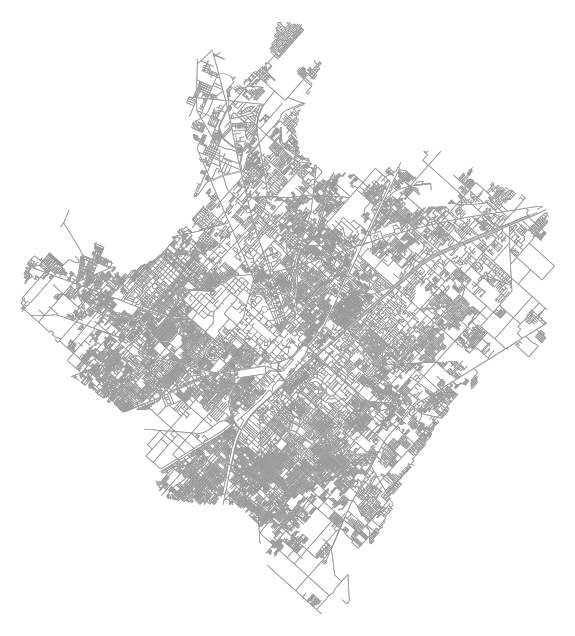

In [10]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define the location for traffic data
place_name = "Faisalabad, Punjab, Pakistan"

# Fetch road network from OpenStreetMap
graph = ox.graph_from_place(place_name, network_type="drive")

# Plot the road network
fig, ax = ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, bgcolor="white")

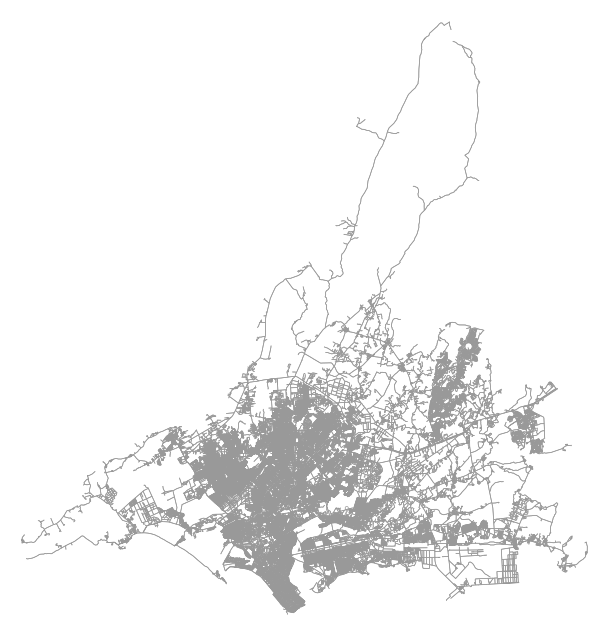

In [17]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define the location for traffic data
place_name1 = "Lahore, Pakistan"

# Fetch road network from OpenStreetMap
graph1 = ox.graph_from_place(place_name, network_type="drive")

# Plot the road network
fig1, ax1 = ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, bgcolor="white")

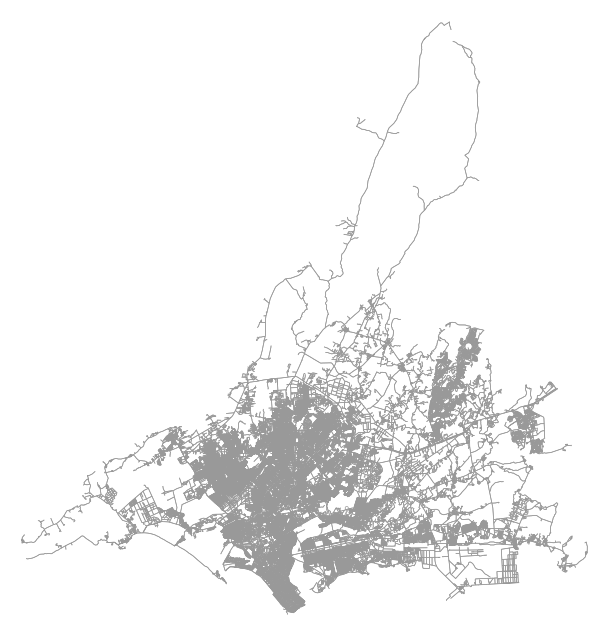

In [18]:
# Define the location for traffic data
place_name2 = "Karachi, Sindh, Pakistan"

# Fetch road network from OpenStreetMap
graph2 = ox.graph_from_place(place_name, network_type="drive")

# Plot the road network
fig2, ax2 = ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, bgcolor="white")

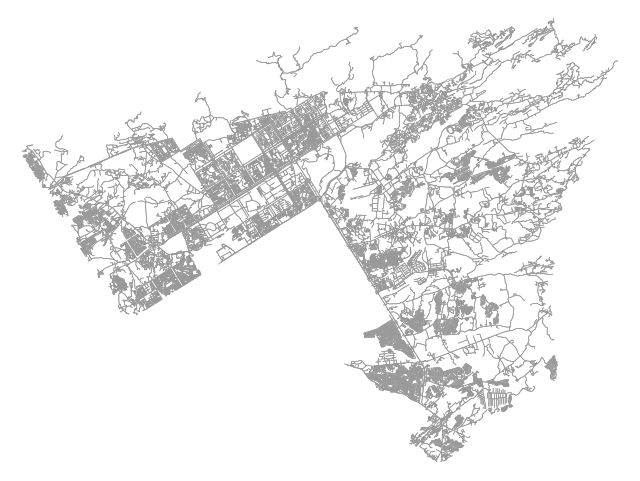

In [35]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define the location for traffic data
place_name3 = "Islamabad, Pakistan"

# Fetch road network from OpenStreetMap
graph3 = ox.graph_from_place(place_name, network_type="drive")

# Plot the road network
fig3, ax3 = ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, bgcolor="white")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset preview:
   Origin Movement ID       Origin Display Name  \
0                 183  SANTA INES, 003107 (183)   
1                 183  SANTA INES, 003107 (183)   
2                 183  SANTA INES, 003107 (183)   
3                 183  SANTA INES, 003107 (183)   
4                 183  SANTA INES, 003107 (183)   

                                     Origin Geometry  Destination Movement ID  \
0  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        4   
1  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        6   
2  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        8   
3  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        9   
4  [[-74.081141,4.595074],[-74.081746,4.595449],[...                       11   

     Destination Display Name  \
0     PALO BLANCO, 005501 (4)   
1   BANCO CENTRAL, 007208 (6)   
2   LA ESTANZUELA, 004104 (8)   
3      LAS NIEVES, 003102 (9)   
4  BARCELONA SUR, 001424

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


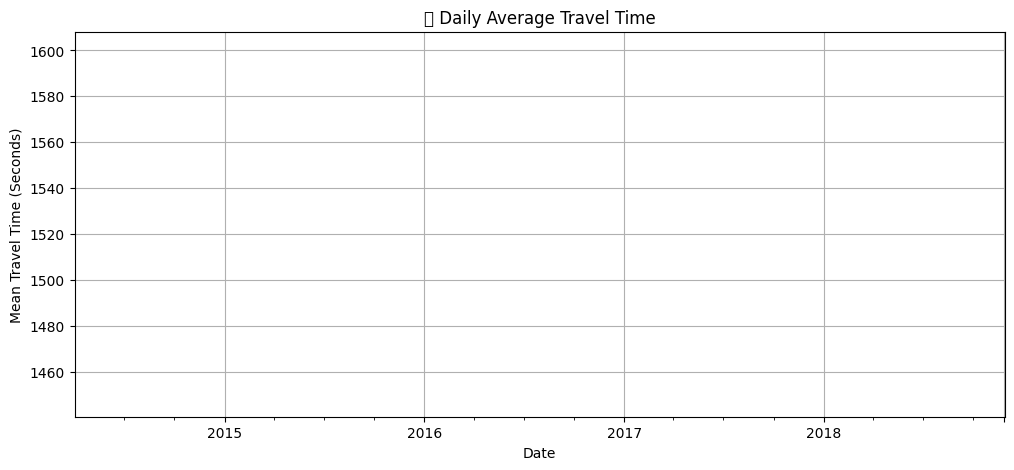

✅ Cleaned dataset saved to: /content/drive/My Drive/cleaned_uber_data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load Uber Movement dataset from Google Drive (update the file path!)
file_path = "/content/drive/My Drive/uber_movement.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# Display first few rows to understand the structure
print("Dataset preview:")
print(df.head())

# Step 4: Extract and parse the 'Start Date' from 'Date Range' column
if 'Date Range' in df.columns:
    df['Start Date'] = df['Date Range'].astype(str).apply(lambda x: x.split(' - ')[0].strip())  # Extract first date
    df['Start Date'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y', errors='coerce')  # Convert to datetime
else:
    print("⚠️ Column 'Date Range' not found!")

# Step 5: Convert 'Mean Travel Time (Seconds)' to numeric, handling errors
if 'Mean Travel Time (Seconds)' in df.columns:
    df['Mean Travel Time (Seconds)'] = pd.to_numeric(df['Mean Travel Time (Seconds)'], errors='coerce')
else:
    print("⚠️ Column 'Mean Travel Time (Seconds)' not found!")

# Drop rows with NaN values in required columns
df.dropna(subset=['Start Date', 'Mean Travel Time (Seconds)'], inplace=True)

# Step 6: Set 'Start Date' as index for time-series analysis
df.set_index('Start Date', inplace=True)

# Step 7: Plot the daily average travel time trend
plt.figure(figsize=(12, 5))

if not df.empty:
    df.resample('D').mean(numeric_only=True)['Mean Travel Time (Seconds)'].plot(
        title="📊 Daily Average Travel Time",
        ylabel="Mean Travel Time (Seconds)",
        xlabel="Date",
        color='royalblue',
        linewidth=2,
    )
    plt.grid(True)
    plt.show()
else:
    print("⚠️ DataFrame is empty after cleaning. No plot generated.")

# Step 8: Save cleaned dataset (optional)
cleaned_file_path = "/content/drive/My Drive/cleaned_uber_data.csv"
df.to_csv(cleaned_file_path, index=True)
print(f"✅ Cleaned dataset saved to: {cleaned_file_path}")